# Dataset modeling for Financial Time Series Data
This document aims to provide information on the research related to find the best format to represent financial time series data with certain data analysis for the usage of machine learning techniques

### On the data provided

,open,high,low,close,adj close,volume
Date,,,,,,
2010-01-04,1.6930,1.7412,1.6723,1.7190,1.7190,0.0
2010-01-05,1.6713,1.7370,1.6713,1.7370,1.7370,0.0
2010-01-06,1.6798,1.7359,1.6798,1.7315,1.7315,0.0
2010-01-07,1.7242,1.7472,1.6805,1.7389,1.7389,0.0
2010-01-08,1.6954,1.7492,1.6954,1.7320,1.7320,0.0


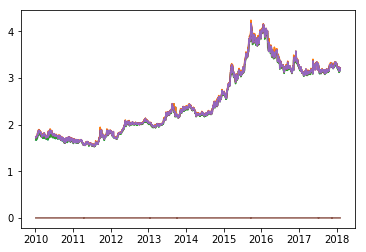

In [1]:
%matplotlib inline

import pandas as pd
import pandas_datareader as web
from IPython.core.display import display
import matplotlib.pylab as plt
from stockstats import StockDataFrame
import seaborn as sns


df = web.DataReader('BRL=X', 'yahoo')
data = pd.DataFrame(df)
data = StockDataFrame.retype(data)
display(data.head())
plt.plot(data.index, data)
plt.show()


### On the indicators

In [2]:
data = pd.read_csv('USDBRL/all_indicators.csv')
display(data.tail())

,Date,open,high,low,close,adj close,volume,close_20_sma,close_20_mstd,boll,...,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma
2100,2018-01-22,3.1912,3.2063,3.1828,3.1947,3.1947,0.0,3.25131,0.045347,3.25131,...,32.424464,32.424464,50.393826,50.393826,44.705562,44.705562,46.145262,46.145262,-0.104079,-0.070007
2101,2018-01-23,3.2007,3.2364,3.1986,3.2007,3.2007,0.0,3.24457,0.042074,3.24457,...,27.456171,27.456171,12.093108,12.093108,35.387718,35.387718,43.071678,43.071678,-0.108291,-0.079818
2102,2018-01-24,3.2337,3.2382,3.1757,3.2355,3.2355,0.0,3.24086,0.039202,3.24086,...,31.174430,31.174430,28.154808,28.154808,33.321172,33.321172,40.285819,40.285819,-0.107148,-0.087835
2103,2018-01-25,3.1451,3.1484,3.1215,3.1451,3.1451,0.0,3.23245,0.040851,3.23245,...,41.194580,41.194580,52.070509,52.070509,38.678126,38.678126,39.826478,39.826478,-0.112533,-0.094800
2104,2018-01-26,3.1454,3.1543,3.1312,3.1469,3.1469,0.0,3.22424,0.040712,3.22424,...,36.821796,36.821796,45.967524,45.967524,40.760811,40.760811,40.093430,40.093430,-0.120949,-0.101018


### Cleaning the dataset and normalizing the movement
Different techniques to represent a price movement can be used to select the one with best results

/Library/Python/2.7/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


,open,high,low,close,adj close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,...,mdi_14,mdi,dx_14,dx,dx_6_ema,adx,adx_6_ema,adxr,trix,trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.1947,3.25131,0.045347,3.25131,3.342003,3.160617,...,32.424464,32.424464,50.393826,50.393826,44.705562,44.705562,46.145262,46.145262,-0.104079,-0.070007
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.2007,3.24457,0.042074,3.24457,3.328719,3.160421,...,27.456171,27.456171,12.093108,12.093108,35.387718,35.387718,43.071678,43.071678,-0.108291,-0.079818
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.2355,3.24086,0.039202,3.24086,3.319265,3.162455,...,31.174430,31.174430,28.154808,28.154808,33.321172,33.321172,40.285819,40.285819,-0.107148,-0.087835
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.1451,3.23245,0.040851,3.23245,3.314153,3.150747,...,41.194580,41.194580,52.070509,52.070509,38.678126,38.678126,39.826478,39.826478,-0.112533,-0.094800
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.1469,3.22424,0.040712,3.22424,3.305665,3.142815,...,36.821796,36.821796,45.967524,45.967524,40.760811,40.760811,40.093430,40.093430,-0.120949,-0.101018


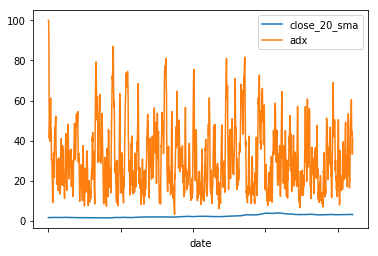

In [3]:
from pandas.util.testing import assert_series_equal
import numpy as np

data = StockDataFrame.retype(data)
cols = data.select_dtypes([np.number]).columns
diff = data[cols].diff().sum()

data = data.drop(diff[diff==0].index, axis=1)
data.plot(x=data.index, y=['close_20_sma','adx'])

display(data.tail())


#### As shown above, different indicators have different metrics, so we need to normalize in various ways and search for the best results 

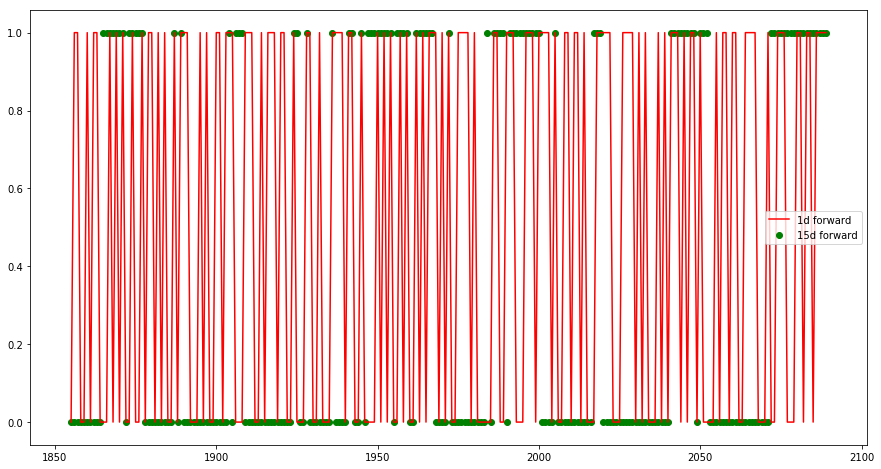

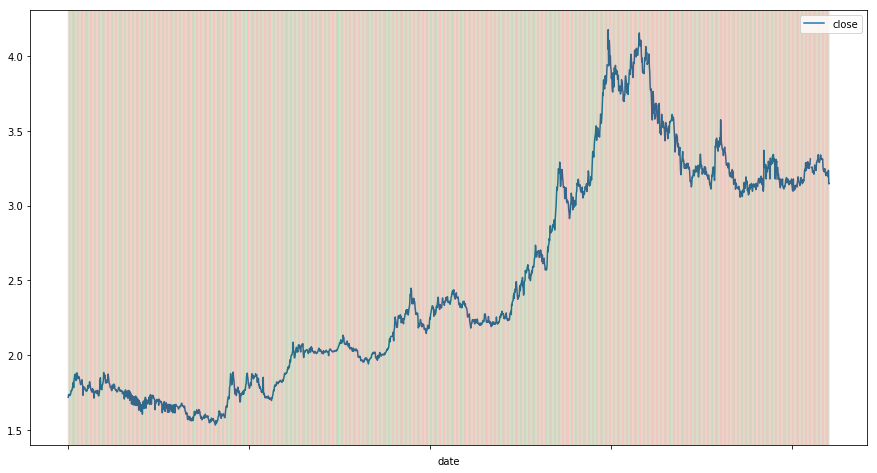

,open,high,low,close,adj close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,...,adx_6_ema,adxr,trix,trix_9_sma,label-1,label-2,label-15,label1,label2,label15
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.1947,3.25131,0.045347,3.25131,3.342003,3.160617,...,46.145262,46.145262,-0.104079,-0.070007,0,0,0,0,0,0
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.2007,3.24457,0.042074,3.24457,3.328719,3.160421,...,43.071678,43.071678,-0.108291,-0.079818,0,1,0,1,0,0
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.2355,3.24086,0.039202,3.24086,3.319265,3.162455,...,40.285819,40.285819,-0.107148,-0.087835,1,1,0,1,1,0
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.1451,3.23245,0.040851,3.23245,3.314153,3.150747,...,39.826478,39.826478,-0.112533,-0.094800,0,0,0,0,0,0
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.1469,3.22424,0.040712,3.22424,3.305665,3.142815,...,40.093430,40.093430,-0.120949,-0.101018,0,0,0,1,0,0


In [4]:
#Labeling the different window frames
##Signaling the difference between a feature datapoint and the previous/next one
       
def labelwf(dataframe, wf):
    for i in wf:
        swf = str(i)
        dataframe['label' + swf] = \
        (dataframe['close'] - dataframe['close'].shift(i))/dataframe['close'].shift(i)
        dataframe['label' + swf] = dataframe['label' + swf].apply(lambda x:1 if x>0.0 else 0)
    return dataframe
    
#Negative for looking future datapoints
#Positive for looking backwards
window_frames = [-1, -2, -15, 1, 2, 15]
data = labelwf(data, window_frames)
index = list(range(len(data)))
index = index[-250:-15]
label1 = data['label-1'].values
label1 = label1[-250:-15]
label15 = data['label-15']. values
label15 = label15[-250:-15]


fig, ax = plt.subplots(figsize=(15, 8), sharey=True)
ax.plot(index, label1, label='1d forward', color='r')
ax.scatter(index, label15, label='15d forward', color='g')
ax.legend()


data['index'] = list(range(len(data)))
data.plot(y='close', figsize=(15, 8))
for r in data.iterrows():
    if r[1]['label1'] == 1:
        plt.axvline(x=r[1]['index'], linewidth=0.3, alpha=0.3, color='g')
    else:
        plt.axvline(x=r[1]['index'], linewidth=0.3, alpha=0.3, color='r')
    
#data.plot(x=data.index, y=['label1','label2','label15'])
#data.plot(x=data.index, y=['label-1','label-2', 'label-15'])
plt.show()
data = data.drop('index', 1)
display(data.tail())

,open,high,low,close,adj close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,...,change_mdi_14,change_mdi,change_dx_14,change_dx,change_dx_6_ema,change_adx,change_adx_6_ema,change_adxr,change_trix,change_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.1947,3.25131,0.045347,3.25131,3.342003,3.160617,...,0.180954,0.180954,3.167153,3.167153,0.263307,0.263307,0.071360,0.071360,-0.038890,-0.122912
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.2007,3.24457,0.042074,3.24457,3.328719,3.160421,...,-0.119273,-0.119273,-0.570478,-0.570478,0.062019,0.062019,0.069152,0.069152,0.010667,-0.091272
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.2355,3.24086,0.039202,3.24086,3.319265,3.162455,...,-0.243240,-0.243240,-0.459295,-0.459295,-0.138501,-0.138501,0.011534,0.011534,-0.047852,-0.073472
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.1451,3.23245,0.040851,3.23245,3.314153,3.150747,...,0.118755,0.118755,0.132767,0.132767,-0.051095,-0.051095,-0.006658,-0.006658,-0.069585,-0.061553
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.1469,3.22424,0.040712,3.22424,3.305665,3.142815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


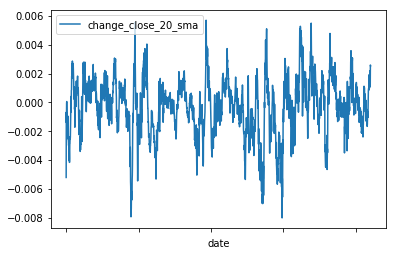

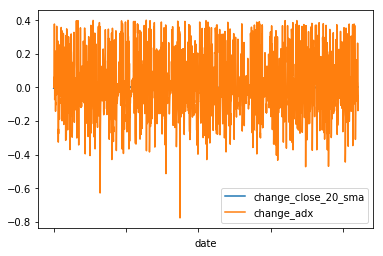

In [5]:
#Normalizing the features datapoints 
#Accordingly to its window frame

#Each datapoint to the change percentage of timeframe
def percent_change(dataframe, wf):
    swf = str(wf)
    for feature in dataframe:
        if 'label' in str(dataframe[feature].name):
            pass
        elif 'change_' in str(dataframe[feature].name):
            pass
        else:
            dataframe['change_' + str(dataframe[feature].name)] = \
            (dataframe[feature] - dataframe[feature].shift(wf))/dataframe[feature].shift(wf)
    return dataframe

data = percent_change(data, -1)
data.plot(x=data.index, y='change_close_20_sma')
data.plot(x=data.index, y=['change_close_20_sma','change_adx'])
                          
display(data.tail())

#### We see in the above picture that even with the percent change ratio we cant diferentiate on how much that change was significant by some orders of magnitude

,open,high,low,close,adj close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,...,rchange_mdi_14,rchange_mdi,rchange_dx_14,rchange_dx,rchange_dx_6_ema,rchange_adx,rchange_adx_6_ema,rchange_adxr,rchange_trix,rchange_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.1947,3.25131,0.045347,3.25131,3.342003,3.160617,...,0.108609,0.108609,0.00572,0.00572,0.223741,0.223741,0.139866,0.139866,-0.000171,-0.000187
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.2007,3.24457,0.042074,3.24457,3.328719,3.160421,...,-0.071588,-0.071588,-0.00103,-0.00103,0.052700,0.052700,0.135540,0.135540,0.000047,-0.000139
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.2355,3.24086,0.039202,3.24086,3.319265,3.162455,...,-0.145993,-0.145993,-0.00083,-0.00083,-0.117689,-0.117689,0.022606,0.022606,-0.000210,-0.000112
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.1451,3.23245,0.040851,3.23245,3.314153,3.150747,...,0.071277,0.071277,0.00024,0.00024,-0.043417,-0.043417,-0.013050,-0.013050,-0.000305,-0.000094
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.1469,3.22424,0.040712,3.22424,3.305665,3.142815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


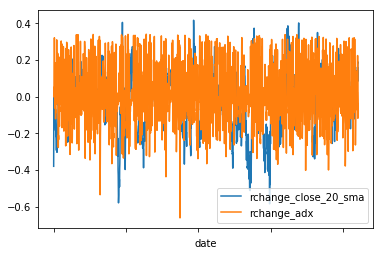

In [6]:
#How abnormal was the change compared to the feature range
def normalized_range(dataframe, wf):
    swf = str(wf)
    for feature in dataframe:
        if 'label' in str(dataframe[feature].name):
            pass
        elif 'change_' in str(dataframe[feature].name):
            pass
        elif 'rchange_' in str(dataframe[feature].name):
            pass
        else:
            range = dataframe['change_' + str(dataframe[feature].name)].max() - \
                                              dataframe['change_' + str(dataframe[feature].name)].min()
            dataframe['rchange_' + str(dataframe[feature].name)] = \
                                              dataframe['change_' + str(dataframe[feature].name)] / range
    return dataframe
                                              

data = normalized_range(data, 1)
data.plot(x=data.index, y=['rchange_close_20_sma','rchange_adx'])

display(data.tail())

                                        

#### As we can see, the datapoints are now expressing in a much more intuiteve manner their movements with a same axis of change

,open,high,low,close,adj close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,...,nchange_mdi_14,nchange_mdi,nchange_dx_14,nchange_dx,nchange_dx_6_ema,nchange_adx,nchange_adx_6_ema,nchange_adxr,nchange_trix,nchange_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,3.1912,3.2063,3.1828,3.1947,3.1947,3.25131,0.045347,3.25131,3.342003,3.160617,...,0.807159,0.807159,0.061377,0.061377,1.333767,1.333767,0.762940,0.762940,-0.018735,-0.034200
2018-01-23,3.2007,3.2364,3.1986,3.2007,3.2007,3.24457,0.042074,3.24457,3.328719,3.160421,...,-0.733941,-0.733941,-0.125298,-0.125298,0.241040,0.241040,0.737807,0.737807,-0.006694,-0.031888
2018-01-24,3.2337,3.2382,3.1757,3.2355,3.2355,3.24086,0.039202,3.24086,3.319265,3.162455,...,-1.370277,-1.370277,-0.119745,-0.119745,-0.847514,-0.847514,0.081781,0.081781,-0.020913,-0.030587
2018-01-25,3.1451,3.1484,3.1215,3.1451,3.1451,3.23245,0.040851,3.23245,3.314153,3.150747,...,0.487887,0.487887,-0.090175,-0.090175,-0.373019,-0.373019,-0.125344,-0.125344,-0.026194,-0.029715
2018-01-26,3.1454,3.1543,3.1312,3.1469,3.1469,3.22424,0.040712,3.22424,3.305665,3.142815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


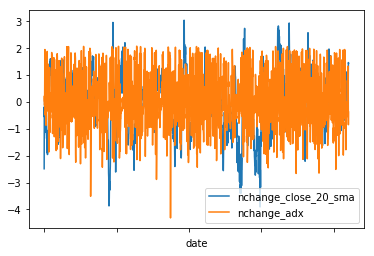

In [7]:
#How abnormal was this change percentage ratio in comparison to the others
def normalized_change(dataframe, wf):
    swf = str(wf)
    for feature in dataframe:
        if 'label' in str(dataframe[feature].name):
            pass
        elif 'change_' in str(dataframe[feature].name):
            pass
        elif 'rchange_' in str(dataframe[feature].name):
            pass
        elif 'nchange_' in str(dataframe[feature].name):
            pass
        else:
            std = dataframe['change_' + str(dataframe[feature].name)].std()
            mean = dataframe['change_' + str(dataframe[feature].name)].mean()
            dataframe['nchange_' + str(dataframe[feature].name)] = \
            (dataframe['change_' + str(dataframe[feature].name)] - mean)/std
    return dataframe

data = normalized_change(data, 1)
data.plot(x=data.index, y=['nchange_close_20_sma','nchange_adx'])
                          
display(data.tail())


#### And now, we can evaluate the order of that anomaly too

,open,high,low,close,adj close,close_20_sma,close_20_mstd,boll,boll_ub,boll_lb,...,nchange_mdi_14,nchange_mdi,nchange_dx_14,nchange_dx,nchange_dx_6_ema,nchange_adx,nchange_adx_6_ema,nchange_adxr,nchange_trix,nchange_trix_9_sma
date,,,,,,,,,,,,,,,,,,,,,
2018-01-22,0.971523,0.962638,0.990861,0.976526,0.976526,1.064250,0.287617,1.064250,1.037354,1.088956,...,0.807159,0.807159,0.061377,0.061377,1.333767,1.333767,0.762940,0.762940,-0.018735,-0.034200
2018-01-23,0.984603,1.004078,1.012810,0.984859,0.984859,1.054878,0.161774,1.054878,1.019686,1.088672,...,-0.733941,-0.733941,-0.125298,-0.125298,0.241040,0.241040,0.737807,0.737807,-0.006694,-0.031888
2018-01-24,1.030037,1.006556,0.980997,1.033192,1.033192,1.049720,0.051326,1.049720,1.007113,1.091625,...,-1.370277,-1.370277,-0.119745,-0.119745,-0.847514,-0.847514,0.081781,0.081781,-0.020913,-0.030587
2018-01-25,0.908053,0.882924,0.905703,0.907637,0.907637,1.038026,0.114736,1.038026,1.000314,1.074627,...,0.487887,0.487887,-0.090175,-0.090175,-0.373019,-0.373019,-0.125344,-0.125344,-0.026194,-0.029715
2018-01-26,0.908466,0.891046,0.919178,0.910137,0.910137,1.026610,0.109398,1.026610,0.989025,1.063111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


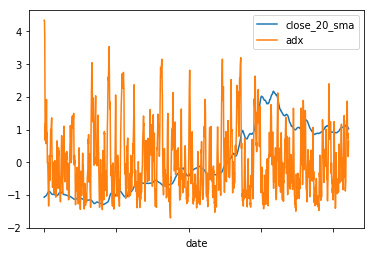

In [8]:
#How abnormal is the position that the datapoint is located at
#We substitute the original feature value for this one
def distance(dataframe):
    for feature in dataframe:
        if 'label' in str(dataframe[feature].name):
            pass
        elif 'change_' in str(dataframe[feature].name):
            pass
        elif 'nchange_' in str(dataframe[feature].name):
            pass
        elif 'rchange_' in str(dataframe[feature].name):
            pass
        else:
            std = dataframe[feature].std()
            mean = dataframe[feature].mean()
            dataframe[feature] = (dataframe[feature] - mean)/std
    return dataframe

data = distance(data)
data.plot(x=data.index, y=['close_20_sma','adx'])


display(data.tail())


#### And evaluate the distance of the datapoint address in comparison to the others of its kind

### T - Distributed Stochastic Neighboor Embedding
Transforming the data into a Similarity Matrix for comparing the similarity of a certain datapoint with the rest

/Library/Python/2.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

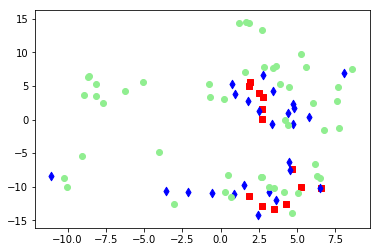

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

data['nlabel'] = data['label1'] + data['label2'] + data['label15'] + data['label-1'] + data['label-2'] + data['label-15']
#print data['nlabel']

counter_nan = data.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]
data = data[counter_without_nan.keys()]
columns = data.columns

x = data.ix[:,:-1].values
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

y = data.ix[:,-1].values
class_labes = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

test_percentage = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size=test_percentage, random_state=0)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)

markers=('s', 'd', 'o', 'ˆ', 'v', '.')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan', 5:'black', 6:'yellow'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization')
plt.show()

/Library/Python/2.7/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,14,19,22,25,70,73,86,87,89,90,94,97,100) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Library/Python/2.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Library/Python/2.7/site-packages/ipykernel_launcher.py:28: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


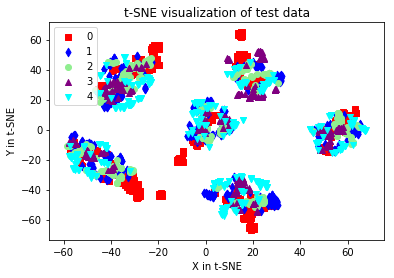

In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

# visulaize the important characteristics of the dataset
import matplotlib.pyplot as plt

# step 1: download the data
dataframe_all = pd.read_csv("https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv")
num_rows = dataframe_all.shape[0]

# step 2: remove useless data
# count the number of missing elements (NaN) in each column
counter_nan = dataframe_all.isnull().sum()
counter_without_nan = counter_nan[counter_nan==0]
# remove the columns with missing elements
dataframe_all = dataframe_all[counter_without_nan.keys()]
# remove the first 7 columns which contain no discriminative information
dataframe_all = dataframe_all.ix[:,7:]
# the list of columns (the last column is the class label)
columns = dataframe_all.columns

# step 3: get features (x) and scale the features
# get x and convert it to numpy array
x = dataframe_all.ix[:,:-1].values
standard_scaler = StandardScaler()
x_std = standard_scaler.fit_transform(x)

# step 4: get class labels y and then encode it into number 
# get class label data
y = dataframe_all.ix[:,-1].values
# encode the class label
class_labels = np.unique(y)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# step 5: split the data into training set and test set
test_percentage = 0.1
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = test_percentage, random_state = 0)

# t-distributed Stochastic Neighbor Embedding (t-SNE) visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)

# scatter plot the sample points among 5 classes
markers=('s', 'd', 'o', '^', 'v')
color_map = {0:'red', 1:'blue', 2:'lightgreen', 3:'purple', 4:'cyan'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper left')
plt.title('t-SNE visualization of test data')
plt.show()

